#### Probabilistic Models Final Project
#### Modeling and Inferring Airline Passenger Satisfaction

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os
# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#loading the data
data=pd.read_csv("train.csv").drop('Unnamed: 0', axis=1)

In [3]:
print(data.iloc[:,0:27].isna().sum())

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [4]:
#Filling in nan values
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(0)

In [5]:
print(data.iloc[:,0:27].isna().sum())

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [6]:
data['Departure Delay in Minutes'] = pd.cut(x=data['Departure Delay in Minutes'], bins=[-1, 10, 30, np.inf],
                     labels=['No delay', 'Acceptable amount of delay', 'Delayed'])

data['Arrival Delay in Minutes'] = pd.cut(x=data['Arrival Delay in Minutes'], bins=[-1, 10, 30, np.inf],
                     labels=['No delay', 'Acceptable amount of delay', 'Delayed'])

In [7]:
data_raw=data.copy()

In [8]:
data['Departure Delay in Minutes']=data['Departure Delay in Minutes'].map(dict({'No delay': 0, 'Acceptable amount of delay':1, 'Delayed':2}))
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].map(dict({'No delay': 0, 'Acceptable amount of delay':1, 'Delayed':2}))

In [9]:
data['Departure Delay in Minutes'].unique(), data['Arrival Delay in Minutes'].unique()

([1, 0, 2]
 Categories (3, int64): [0 < 1 < 2],
 [1, 0, 2]
 Categories (3, int64): [0 < 1 < 2])

In [10]:
# Convert category to int array
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].astype('int')
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].astype('int')

In [11]:
data['Gender']=data['Gender'].map(dict({'Male': 0, 'Female': 1}))
data['Customer Type']=data['Customer Type'].map(dict({'disloyal Customer': 0, 'Loyal Customer': 1}))
data['Type of Travel']=data['Type of Travel'].map(dict({'Personal Travel': 0, 'Business travel': 1}))
#data['Class']=data['Class'].map(dict({'Eco Plus': 0, 'Business': 1, 'Eco': 2}))
data['satisfaction']=data['satisfaction'].map(dict({'neutral or dissatisfied': 0, 'satisfied': 1}))

In [12]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,1,1,0
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,0,0,0
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,1,0,0
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,0,0,0
103900,73097,0,1,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0,1
103901,68825,0,0,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,0,1,0
103902,54173,1,0,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0,0


In [13]:
def oheColumn(oheData, columnName):
    oneHotEnc = OneHotEncoder(dtype=int, handle_unknown='ignore')

    oheDataColumn = oneHotEnc.fit_transform(oheData[[columnName]]).toarray()

    oheData[oneHotEnc.categories_[0]] = oheDataColumn

    for catCol in oneHotEnc.categories_[0]:
        oheData.rename(columns = {catCol:columnName+'_'+catCol}, inplace = True)
    
    return oheData

In [14]:
data = oheColumn(data, 'Class').drop('Class', axis=1)

In [15]:
data

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,1,1,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,0,0,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,1,0,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,192,2,1,2,3,...,4,2,3,2,0,0,0,0,1,0
103900,73097,0,1,49,1,2347,4,4,4,4,...,5,5,5,4,0,0,1,1,0,0
103901,68825,0,0,30,1,1995,1,1,1,3,...,4,5,5,4,0,1,0,1,0,0
103902,54173,1,0,22,1,1000,1,1,1,5,...,1,5,4,1,0,0,0,0,1,0


In [16]:
data=data.drop_duplicates()

<AxesSubplot:>

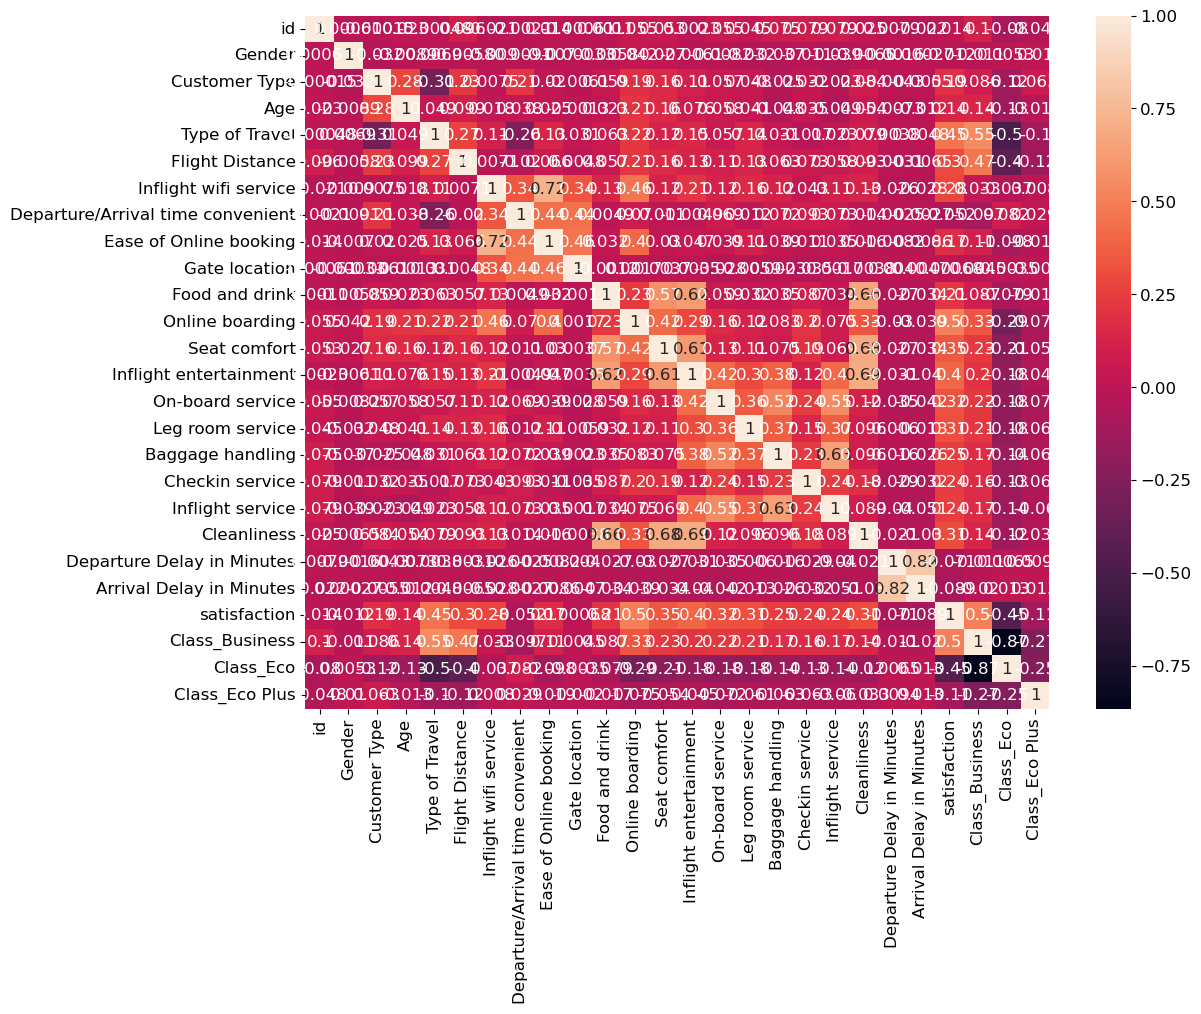

In [17]:
corrMatrix = data.corr()
#print(corrMatrix)
sns.heatmap(corrMatrix, annot=True,)

In [18]:
data1=data_raw.loc[:, ['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class','Inflight entertainment','Seat comfort']]#data.drop("id", axis=1) 'Inflight entertainment''Seat comfort'

In [19]:
data1

,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,On-board service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class,Inflight entertainment,Seat comfort
0,Personal Travel,3,3,5,3,4,4,5,5,Acceptable amount of delay,Acceptable amount of delay,neutral or dissatisfied,Eco Plus,5,5
1,Business travel,3,3,1,3,1,3,4,1,No delay,No delay,neutral or dissatisfied,Business,1,1
2,Business travel,2,2,5,5,4,4,4,5,No delay,No delay,satisfied,Business,5,5
3,Business travel,2,5,2,2,2,3,4,2,Acceptable amount of delay,No delay,neutral or dissatisfied,Business,2,2
4,Business travel,3,3,4,5,3,4,3,3,No delay,No delay,satisfied,Business,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Business travel,2,2,2,2,3,4,3,2,No delay,No delay,neutral or dissatisfied,Eco,2,2
103900,Business travel,4,4,2,4,5,5,5,4,No delay,No delay,satisfied,Business,5,5
103901,Business travel,1,1,4,1,3,4,5,4,No delay,Acceptable amount of delay,neutral or dissatisfied,Business,4,5
103902,Business travel,1,1,1,1,4,1,4,1,No delay,No delay,neutral or dissatisfied,Eco,1,1


In [20]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square
est = PC(data1)
# print(est.estimate(significance_level=0.01).edges())

In [21]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
hc = HillClimbSearch(data1)
best_model = hc.estimate(scoring_method=BicScore(data1))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Type of Travel', 'Class'), ('Type of Travel', 'Ease of Online booking'), ('Type of Travel', 'Arrival Delay in Minutes'), ('Inflight wifi service', 'Ease of Online booking'), ('Inflight wifi service', 'satisfaction'), ('Inflight wifi service', 'Class'), ('Inflight wifi service', 'Type of Travel'), ('Ease of Online booking', 'Class'), ('Food and drink', 'Seat comfort'), ('Food and drink', 'Online boarding'), ('Online boarding', 'satisfaction'), ('Online boarding', 'Ease of Online booking'), ('Online boarding', 'Inflight wifi service'), ('On-board service', 'Inflight entertainment'), ('On-board service', 'Food and drink'), ('On-board service', 'Cleanliness'), ('Baggage handling', 'Inflight service'), ('Baggage handling', 'On-board service'), ('Baggage handling', 'Inflight entertainment'), ('Baggage handling', 'Type of Travel'), ('Baggage handling', 'Inflight wifi service'), ('Inflight service', 'On-board service'), ('Inflight service', 'Cleanliness'), ('Inflight service', 'Inflight ent

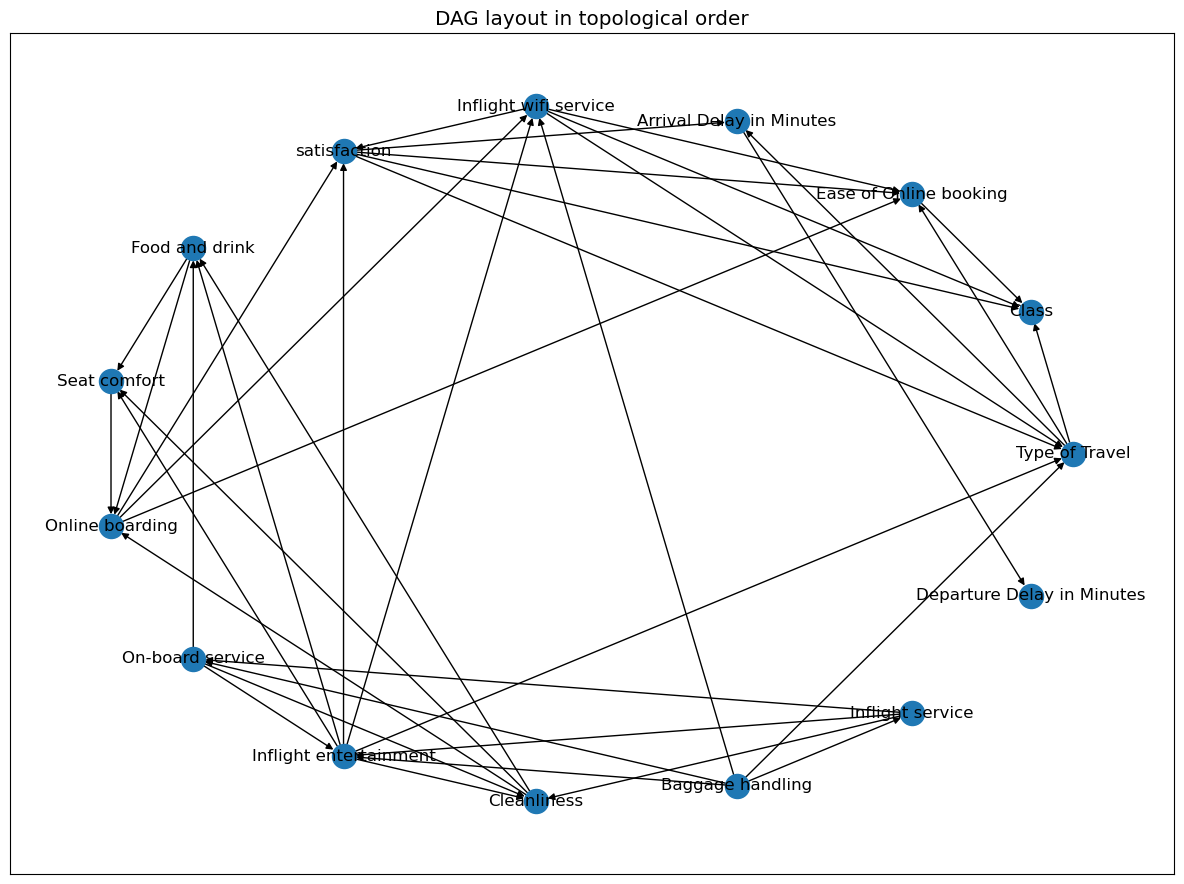

In [22]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(best_model.edges())

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(G, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

the features which we are inferring are\

1)Satisfaction\
2)Type of Travel

In [23]:
#Maximum likelihood estimator

In [24]:
from pgmpy.models import BayesianModel

model = BayesianModel(best_model.edges())

In [25]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data1)
# print(mle.estimate_cpd('satisfaction'))  # unconditional
mle_df=mle.estimate_cpd('satisfaction')

In [26]:
print(mle_df)

+---------------------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------------------+-------

In [27]:
from pgmpy.factors.discrete.CPD import TabularCPD

def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

In [28]:
# print_full(mle_df)

In [29]:
mle.get_parameters()

[<TabularCPD representing P(Type of Travel:2 | Baggage handling:5, Inflight entertainment:6, Inflight wifi service:6, satisfaction:2) at 0x2288e0b4220>,
 <TabularCPD representing P(Class:3 | Ease of Online booking:6, Inflight wifi service:6, Type of Travel:2, satisfaction:2) at 0x2288e0235b0>,
 <TabularCPD representing P(Ease of Online booking:6 | Inflight wifi service:6, Online boarding:6, Type of Travel:2, satisfaction:2) at 0x2288e09bca0>,
 <TabularCPD representing P(Arrival Delay in Minutes:3 | Type of Travel:2, satisfaction:2) at 0x2288ea118e0>,
 <TabularCPD representing P(Inflight wifi service:6 | Baggage handling:5, Inflight entertainment:6, Online boarding:6) at 0x2288e07a760>,
 <TabularCPD representing P(satisfaction:2 | Inflight entertainment:6, Inflight wifi service:6, Online boarding:6) at 0x2288e0a6e20>,
 <TabularCPD representing P(Food and drink:6 | Cleanliness:6, Inflight entertainment:6, On-board service:6) at 0x2288e0a6c70>,
 <TabularCPD representing P(Seat comfort:6 |

In [30]:
print(mle.estimate_cpd('Class'))

+------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+---------------------------------------+---------------------------------+------------

In [31]:
# best_model.edges()

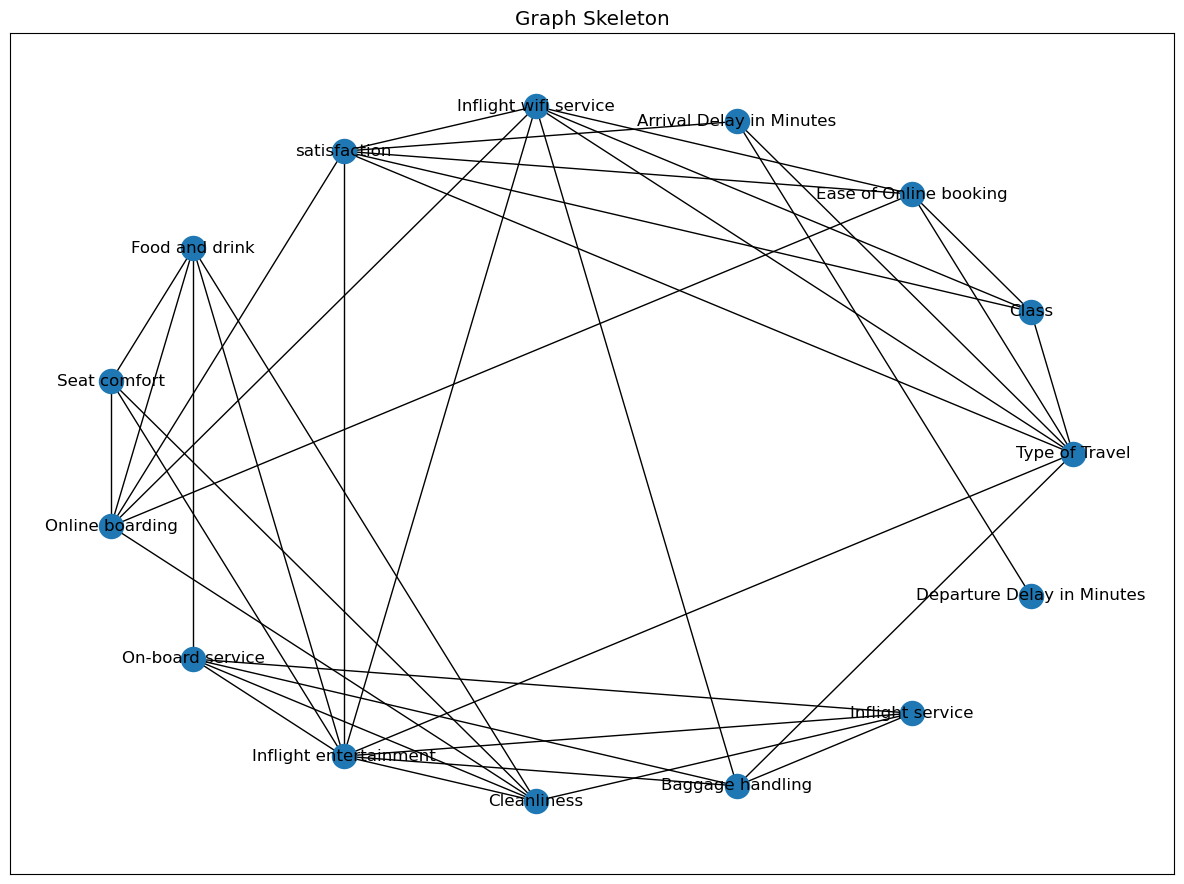

In [32]:
import networkx as nx

DG = G.copy()

# Create the graph skeleton (undirected graph)
UG = DG.to_undirected()
# print("\nGraph Skeleton:")
# print(UG.edges)

# for layer, nodes in enumerate(nx.topological_generations(UG)):
#     # `multipartite_layout` expects the layer as a node attribute, so add the
#     # numeric layer value as a node attribute
#     for node in nodes:
#         UG.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(UG, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(UG, pos=pos, ax=ax)
ax.set_title("Graph Skeleton")
fig.tight_layout()
plt.show()

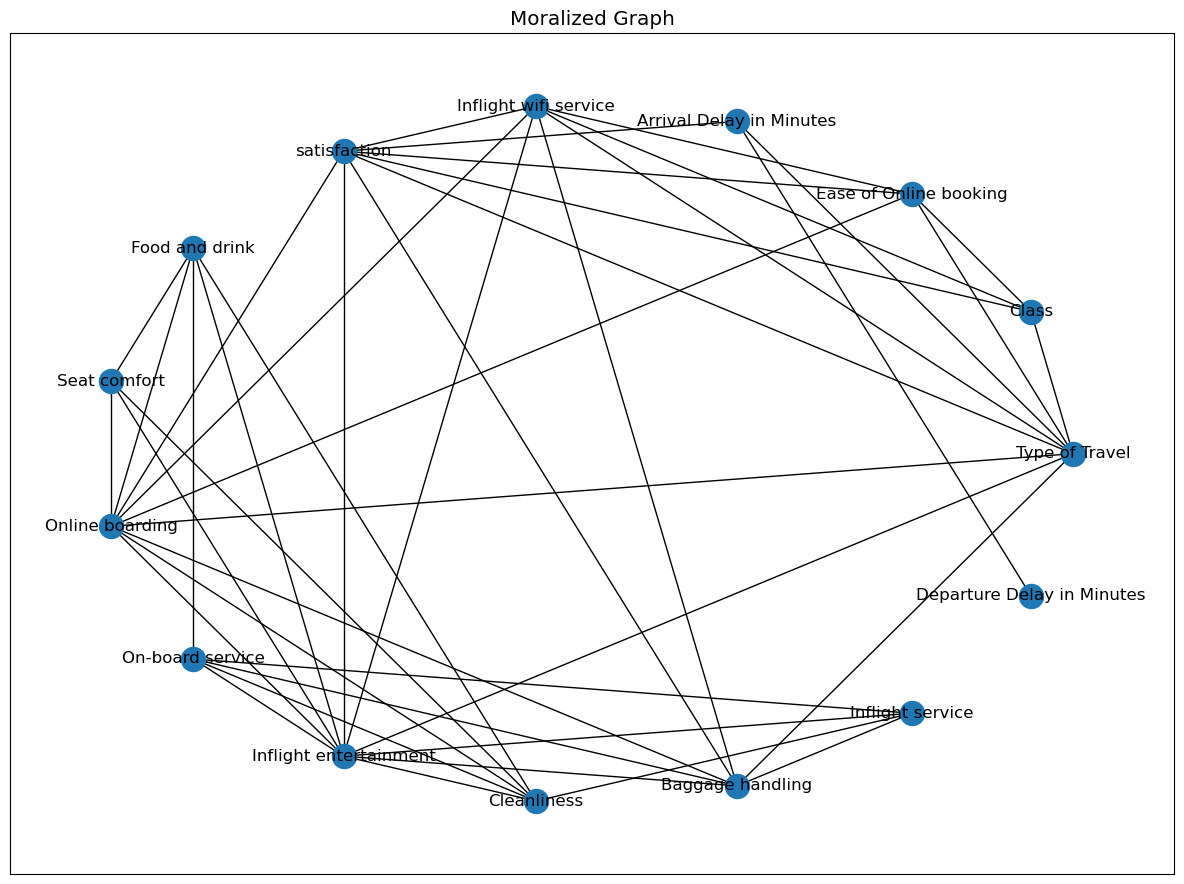

In [33]:
# Moralize the graph
for node in DG.nodes:
    parents = [pred for pred in DG.predecessors(node)]
    for i, parent1 in enumerate(parents):
        for parent2 in parents[i + 1:]:
            if not UG.has_edge(parent1, parent2):
                UG.add_edge(parent1, parent2)
# print("\nMoralized Graph:")
# print(UG.edges)
# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(UG, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(UG, pos=pos, ax=ax)
ax.set_title("Moralized Graph")
fig.tight_layout()
plt.show()

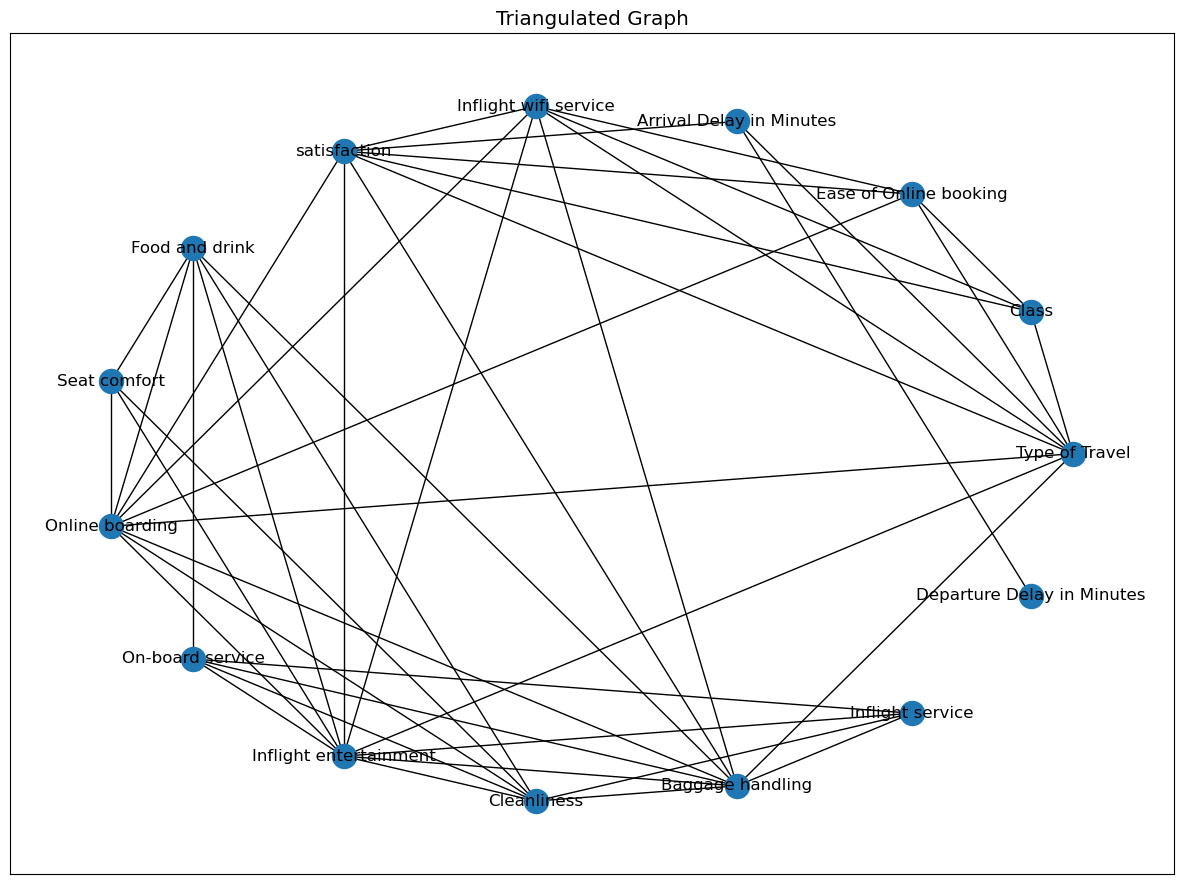

In [34]:
# Triangulate the graph
def find_chordal_graph(graph):
    triangulated_graph = graph.copy()
#     cliques = nx.chordal_graph_cliques(triangulated_graph)
    fill_in_edges = nx.complete_to_chordal_graph(triangulated_graph)

    for u, v in fill_in_edges[0].edges():
        triangulated_graph.add_edge(u, v)

    return triangulated_graph

T_UG = find_chordal_graph(UG)
# print("\nTriangulated Graph:")
# print(triangulated_UG.edges)
# Compute the multipartite_layout using the "layer" node attribute
# pos = nx.multipartite_layout(G, subset_key="layer")
pos=nx.circular_layout(T_UG, scale=1, center=None, dim=2)
# nx.spring_layout(G)#nx.nx_pydot.graphviz_layout(G)
# 
fig, ax = plt.subplots()
nx.draw_networkx(T_UG, pos=pos, ax=ax)
ax.set_title("Triangulated Graph")
fig.tight_layout()
plt.show()

### Joint distribution

In [35]:
import numpy as np

# Define the prior distributions for each variable
prior_A = np.array([0.6, 0.4])         # P(A): A has two states, 0 and 1
prior_B_given_A = np.array([[0.7, 0.3], # P(B|A=0): B has two states, 0 and 1
                            [0.2, 0.8]]) # P(B|A=1): B has two states, 0 and 1

# Compute the joint prior distribution P(A, B)
joint_prior_AB = np.outer(prior_A, prior_B_given_A.T)

print("Joint Prior Distribution P(A, B):")
print(joint_prior_AB)

Joint Prior Distribution P(A, B):
[[0.42 0.12 0.18 0.48]
 [0.28 0.08 0.12 0.32]]


In [36]:
# Define the prior distributions for each variable
prior_A = np.array([0.6, 0.4])         # P(A): A has two states, 0 and 1
prior_B_given_A = np.array([[0.7, 0.3], # P(B|A=0): B has two states, 0 and 1
                            [0.2, 0.8]]) # P(B|A=1): B has two states, 0 and 1

# Compute the joint prior distribution P(A, B)
joint_prior_AB = np.outer(prior_A, prior_B_given_A.T)

# Compute the marginal distribution P(B)
marginal_B = np.sum(joint_prior_AB, axis=0)

# Observed data: B = 1
observed_B = 1

# Compute the posterior distribution P(A|B=1)
posterior_A_given_B = (prior_B_given_A[:, observed_B] * prior_A) / marginal_B[observed_B]

print("Posterior Distribution P(A|B=1):")
print(posterior_A_given_B)

Posterior Distribution P(A|B=1):
[0.9 1.6]


In [37]:
data1.columns

Index(['Type of Travel', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class', 'Inflight entertainment', 'Seat comfort'],
      dtype='object')

In [38]:
probs = data1.value_counts(['Type of Travel', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class', 'Inflight entertainment', 'Seat comfort'], normalize=True)

In [39]:
pd.DataFrame(probs)

0
Type of Travel  Inflight wifi service Ease of Online booking Food and drink Online boarding On-board service Baggage handling Inflight service Cleanliness Departure Delay in Minutes Arrival Delay in Minutes satisfaction            Class    Inflight entertainment Seat comfort          
Business travel 4                     4                      4              4               4                4                4                4           No delay                   No delay                 satisfied               Business 4                      4             0.000452
                3                     3                      4              4               4                4                4                4           No delay                   No delay                 satisfied               Business 4                      4             0.000443
                                                             5              5               5                5                5                5           No delay                   No delay                 satisfied               Business 5                      5             0.000414
Personal Travel 3                     3                      2              3               5                5                4                2           No delay                   No delay                 neutral or dissatisfied Eco      2                      2             0.000375
                                                             4              3               3                4                4                4           No delay                   No delay                 neutral or dissatisfied Eco      4                      4             0.000366
...                                                                                                                                                                                                                                                                                       ...
Business travel 3                     3                      4              3               4                3                3                4           No delay                   No delay                 neutral or dissatisfied Business 4                      2             0.000010
                                                                                                                                                                                                                                       Eco      4                      1             0.000010
                                                                                                                                                                                                                                                                       2             0.000010
                                                                                                                                                                                                                                       Eco Plus 4                      4             0.000010
Personal Travel 5                     5                      5              5               5                5                5                5           Acceptable amount of delay No delay                 satisfied               Eco      5                      5             0.000010

[63712 rows x 1 columns]

In [40]:
# Prob_death=round(data_death.pivot_table(index="Class",columns=["Gender","Age"],values="Outcome",  aggfunc=["count"]).div(len(data_death)),3).fillna(0).rename(columns ={"count" :"Death" })

**Finding Prior Distribution**

In [41]:
# Prior distribution
prior = data1.value_counts(['satisfaction'], normalize=True)

In [42]:
prior

satisfaction           
neutral or dissatisfied    0.566667
satisfied                  0.433333
dtype: float64

**Finding likelihood Distribution**

In [43]:
data_satisfied=data1.query("satisfaction == 'satisfied'")

In [44]:
data_satisfied

,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,On-board service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class,Inflight entertainment,Seat comfort
2,Business travel,2,2,5,5,4,4,4,5,No delay,No delay,satisfied,Business,5,5
4,Business travel,3,3,4,5,3,4,3,3,No delay,No delay,satisfied,Business,3,5
7,Business travel,4,4,5,5,5,5,5,4,No delay,No delay,satisfied,Business,5,5
13,Personal Travel,4,4,4,4,4,2,2,4,No delay,No delay,satisfied,Eco,4,4
16,Business travel,3,3,4,4,5,4,4,4,Delayed,Delayed,satisfied,Business,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,Business travel,3,5,2,5,3,3,3,3,No delay,No delay,satisfied,Eco Plus,3,4
103891,Business travel,5,5,2,5,4,4,4,4,Delayed,Delayed,satisfied,Business,4,5
103894,Business travel,4,4,5,5,3,4,4,5,Acceptable amount of delay,Acceptable amount of delay,satisfied,Business,5,5
103897,Business travel,5,5,5,5,4,4,4,4,No delay,No delay,satisfied,Business,4,4


In [45]:
Likelihood_Prob_satisfied=round(data_satisfied.pivot_table(index=['Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class','Inflight entertainment','Seat comfort'],values="satisfaction"
                                                           ,  aggfunc=["count"]),2).fillna(0).stack()
Likelihood_Prob_satisfied=Likelihood_Prob_satisfied.div(Likelihood_Prob_satisfied.loc[:,'count'].values.sum())
Likelihood_Prob_satisfied
#.rename(columns ={"count" :"Death" })
# .div(len(data_satisfied))

count
Type of Travel  Inflight wifi service Ease of Online booking Food and drink Online boarding On-board service Baggage handling Inflight service Cleanliness Class    Inflight entertainment Seat comfort                       
Business travel 0                     0                      0              1               2                4                4                3           Eco Plus 5                      3            satisfaction  0.000022
                                                                            2               1                3                4                2           Eco      1                      2            satisfaction  0.000022
                                                                                            2                4                3                2           Business 3                      2            satisfaction  0.000044
                                                                                            4                4                3                2           Business 4                      2            satisfaction  0.000022
                                                                                            5                4                3                2           Business 5                      2            satisfaction  0.000022
...                                                                                                                                                                                                                        ...
Personal Travel 5                     5                      5              5               5                5                4                5           Eco      5                      5            satisfaction  0.000178
                                                                                                                              5                3           Eco      5                      5            satisfaction  0.000022
                                                                                                                                               5           Eco      5                      2            satisfaction  0.000022
                                                                                                                                                                                           4            satisfaction  0.000022
                                                                                                                                                                                           5            satisfaction  0.000111

[19304 rows x 1 columns]

'Departure Delay in Minutes' and 'Arrival Delay in Minutes' were dropped as they increased size of the dataframe and so our systems did not have enough computaional power to compute the likelihood porbabilities.

In [46]:
#Likelihood_Prob_satisfied.query("'count'==Likelihood_Prob_satisfied.max()")
maxLikelihoodValue = Likelihood_Prob_satisfied.max()
maxLikelihoodSequence=dict(zip(('Type of Travel', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness',
       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class','Inflight entertainment','Seat comfort'),
         Likelihood_Prob_satisfied[Likelihood_Prob_satisfied==maxLikelihoodValue].index[0]))
#maxLikelihoodSequence=dict(('Type of Travel', 'Inflight wifi service',
#       'Ease of Online booking', 'Food and drink', 'Online boarding', 'On-board service',
#       'Baggage handling', 'Inflight service', 'Cleanliness',
#       #'Departure Delay in Minutes', 'Arrival Delay in Minutes',
#       'Class','Inflight entertainment','Seat comfort')=Likelihood_Prob_satisfied[Likelihood_Prob_satisfied==Likelihood_Prob_satisfied.max()].index[0])

#Likelihood_Prob_satisfied[Likelihood_Prob_satisfied['count']==Likelihood_Prob_satisfied.max()].index

In [51]:
#print(f"The maximum likelihood probability is {maxLikelihoodValue} \n with the sequence {maxLikelihoodSequence}")

**The maximum likelihood probability is {{maxLikelihoodValue}} <br>with the sequence {{maxLikelihoodSequence}}**

In [48]:
# Likelihood_Prob_satisfied_prob = pd.DataFrame(Likelihood_Prob_satisfied.value_counts(normalize=True))

In [49]:
#Likelihood_Prob_satisfied_prob.drop
# Likelihood_Prob_satisfied_prob=Likelihood_Prob_satisfied_prob.stack()

In [50]:
# max_likelihood_index = Likelihood_Prob_satisfied_prob[Likelihood_Prob_satisfied_prob==Likelihood_Prob_satisfied_prob.max()].index[0][0]
# Likelihood_Prob_satisfied.index
#Likelihood_Prob_satisfied[Likelihood_Prob_satisfied_prob[Likelihood_Prob_satisfied_prob==Likelihood_Prob_satisfied_prob.max()].index]